In [2]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

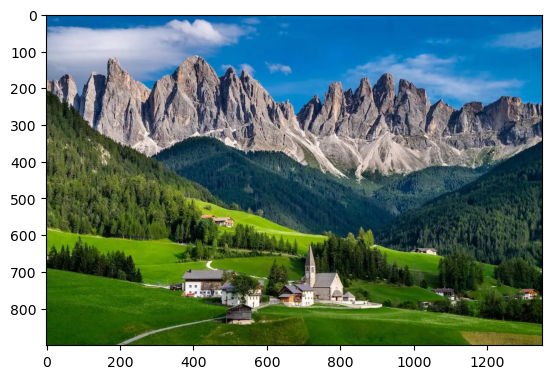

In [4]:
img = cv.imread('..//img/imagen1.jpg')

plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
plt.show()

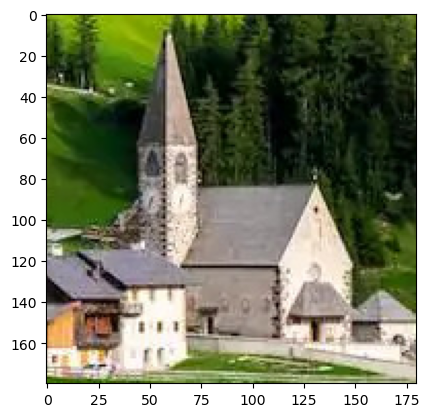

In [22]:
plt.imshow(cv.cvtColor(img[620:800, 660:840, :], cv.COLOR_BGR2RGB))
plt.show()
imgCortada = img[620:800, 660:840, :]
plt.imsave('..//img/imgCortada.jpg', imgCortada)

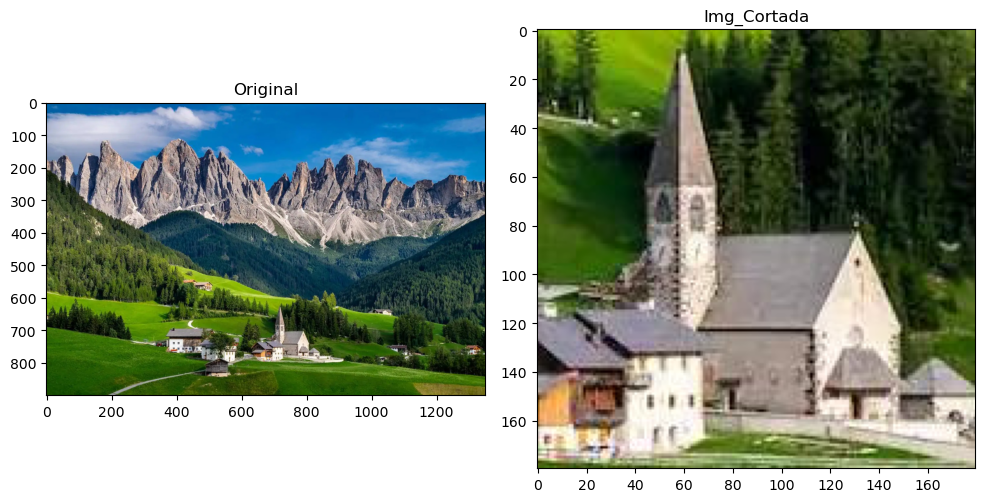

In [23]:
imgCor = plt.imread('..//img/imgCortada.jpg')
img = cv.imread('..//img/imagen1.jpg')


plt.figure(figsize=(10, 5))

plt.subplot(1,2,1)
plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
plt.title('Original')

plt.subplot(1,2,2)
plt.imshow(cv.cvtColor(imgCor, cv.COLOR_BGR2RGB))
plt.title('Img_Cortada')

plt.tight_layout()
plt.show()

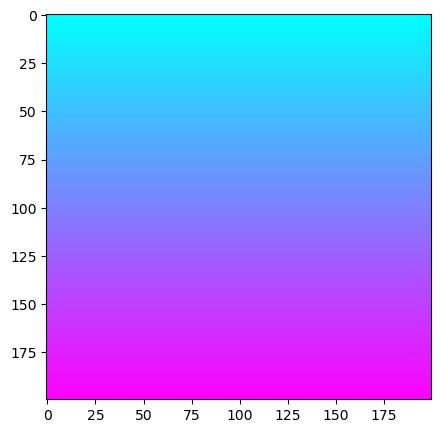

In [53]:
w = 200
h = 200 

gradiante = np.zeros((h, w, 3), dtype= np.uint8)

for i in range(w):
    gradiante[i] = [i * 255 // w, 255 - i * 255 // w, 255]

plt.figure(figsize=(10, 5))

plt.imshow(gradiante)

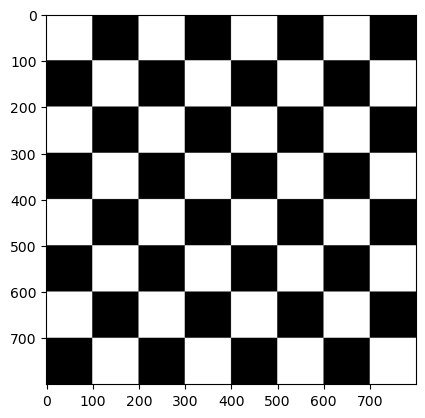

In [83]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

color = [0,0,0]
filas, columnas = 800, 800 
nI = filas/8
nJ = columnas/8
img = np.ones((filas, columnas, 3)) 



def pintar(img,x0,x1,y0,y1,color):
    for x in range(int(x0),int(x1)):
        for y in range(int(y0),int(y1)):
            img[x][y] = np.array(color) 

for i in range(8):
    for j in range(8):
        if (i+j)%2==1: 
            pintar(img, i * nI, (i + 1) * nI, j * nJ, (j + 1) * nJ, color) 


plt.imshow(img)
plt.show()

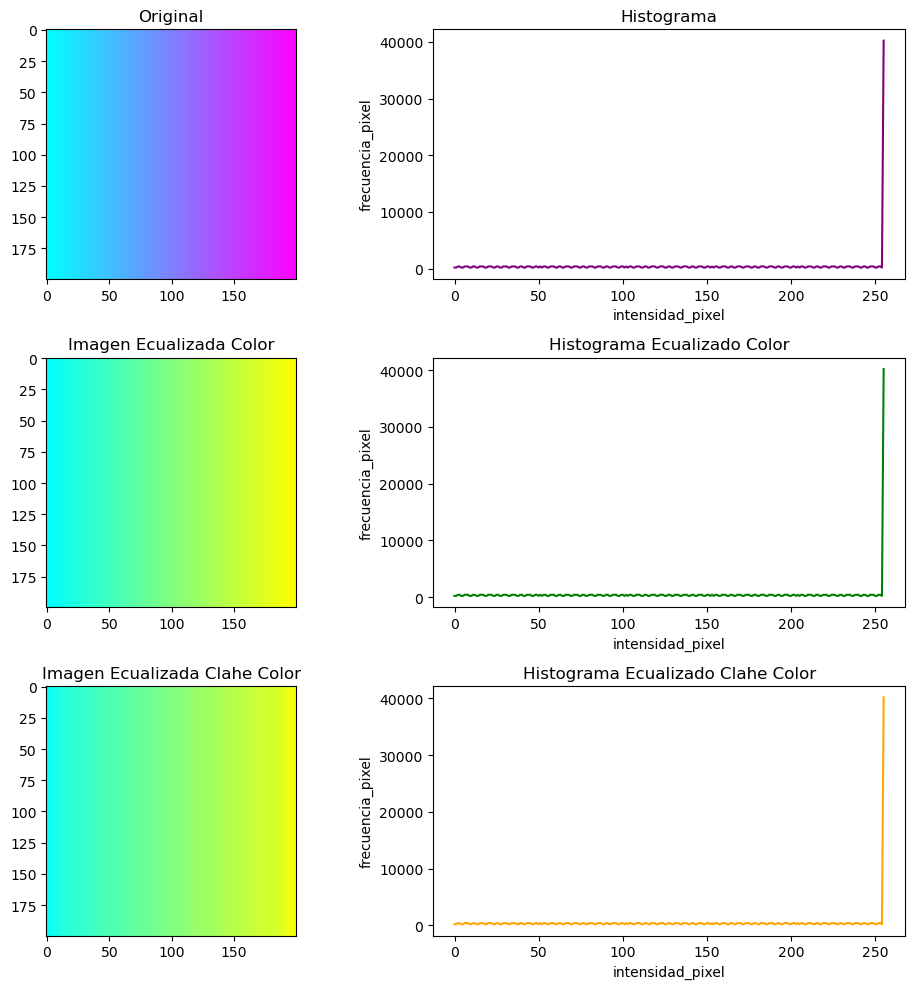

In [43]:

clahe =  cv.createCLAHE(clipLimit= 2.0, tileGridSize= (8, 8))

histograma = np.histogram(gradiante, 256, [0, 256])

red, green, blue = cv.split(gradiante)

contraste_blue = clahe.apply(red)
contraste_red =  clahe.apply(green)
contraste_green = clahe.apply(blue)
finImgClahe = cv.merge((contraste_red, contraste_green, contraste_blue))
histograma_clahe = np.histogram(gradiante, 256, [0, 256])

contraste_blue = cv.equalizeHist(red)
contraste_red =  cv.equalizeHist(green)
contraste_green = cv.equalizeHist(blue)
finImgEcua = cv.merge((contraste_red, contraste_green, contraste_blue))
histograma_ecua = np.histogram(gradiante, 256, [0, 256])

plt.figure(figsize=(10, 10))

plt.subplot(3, 2, 1)
plt.title('Original')
plt.imshow(gradiante)

plt.subplot(3, 2, 2)
plt.plot(histograma[0], color='purple')
plt.title('Histograma')
plt.xlabel('intensidad_pixel')
plt.ylabel('frecuencia_pixel')

plt.subplot(3, 2, 3)
plt.title('Imagen Ecualizada Color')
plt.imshow(cv.cvtColor(finImgEcua, cv.COLOR_BGR2RGB))

plt.subplot(3, 2, 4)
plt.plot(histograma_ecua[0], color='green')
plt.title('Histograma Ecualizado Color')
plt.xlabel('intensidad_pixel')
plt.ylabel('frecuencia_pixel')

plt.subplot(3, 2, 5)
plt.title('Imagen Ecualizada Clahe Color')
plt.imshow(cv.cvtColor(finImgClahe, cv.COLOR_BGR2RGB))

plt.subplot(3, 2, 6)
plt.plot(histograma_clahe[0], color='orange')
plt.title('Histograma Ecualizado Clahe Color')
plt.xlabel('intensidad_pixel')
plt.ylabel('frecuencia_pixel')

plt.tight_layout()
plt.show()

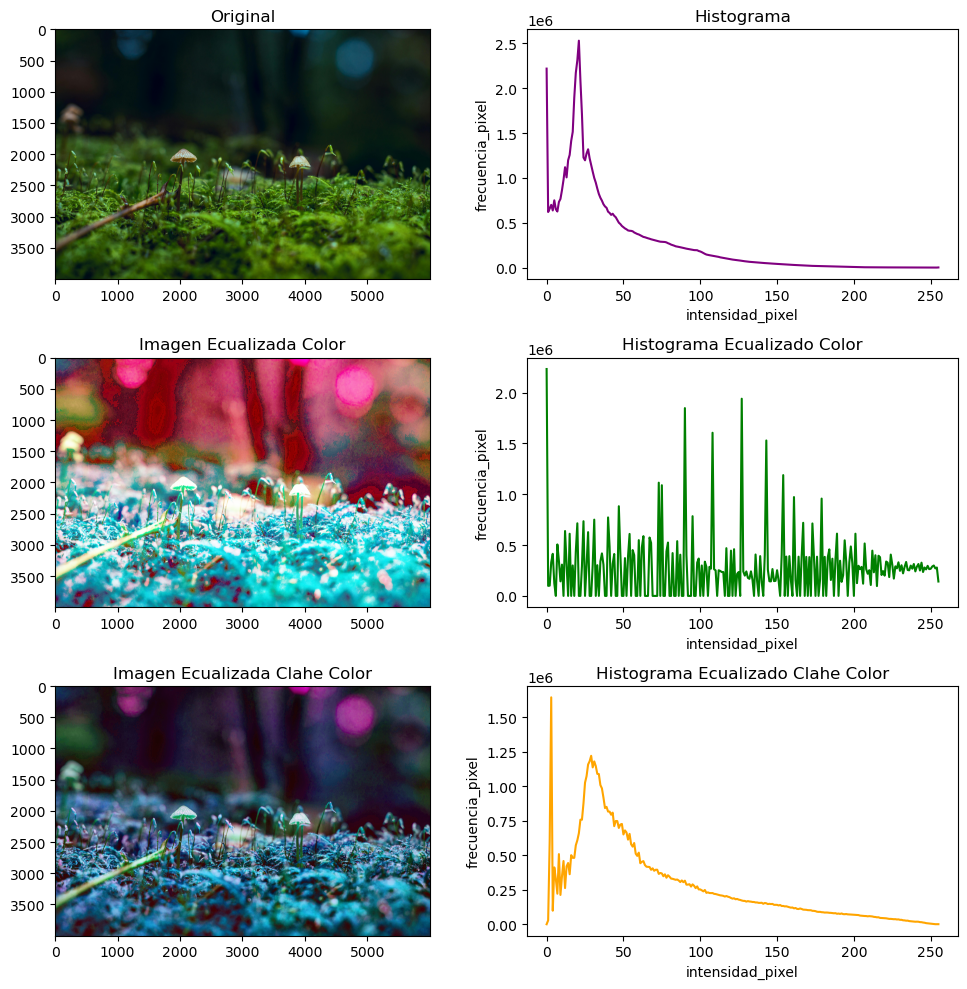

In [84]:



img = cv.imread('..//img/naturaleza.jpg', 1)
clahe =  cv.createCLAHE(clipLimit= 2.0, tileGridSize= (8, 8))



histograma = np.histogram(img, 256, [0, 256])




red, green, blue = cv.split(img)
# Clahe 
contraste_blue = clahe.apply(red)
contraste_red =  clahe.apply(green)
contraste_green = clahe.apply(blue)
finImgClahe = cv.merge((contraste_red, contraste_green, contraste_blue))
histograma_clahe = np.histogram(finImgClahe, 256, [0, 256])

# Ecualizador
contraste_blue = cv.equalizeHist(red)
contraste_red =  cv.equalizeHist(green)
contraste_green = cv.equalizeHist(blue)
finImgEcua = cv.merge((contraste_red, contraste_green, contraste_blue))
histograma_ecua = np.histogram(finImgEcua, 256, [0, 256])

plt.figure(figsize=(10, 10))
# Original Image
plt.subplot(3, 2, 1)
plt.title('Original')
plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))

# Histogram
plt.subplot(3, 2, 2)
plt.plot(histograma[0], color='purple')
plt.title('Histograma')
plt.xlabel('intensidad_pixel')
plt.ylabel('frecuencia_pixel')

# Equalized Image
plt.subplot(3, 2, 3)
plt.title('Imagen Ecualizada Color')
plt.imshow(cv.cvtColor(finImgEcua, cv.COLOR_BGR2RGB))

# Equalized Histogram
plt.subplot(3, 2, 4)
plt.plot(histograma_ecua[0], color='green')
plt.title('Histograma Ecualizado Color')
plt.xlabel('intensidad_pixel')
plt.ylabel('frecuencia_pixel')

# Equalized Image
plt.subplot(3, 2, 5)
plt.title('Imagen Ecualizada Clahe Color')
plt.imshow(cv.cvtColor(finImgClahe, cv.COLOR_BGR2RGB))

# Equalized Histogram
plt.subplot(3, 2, 6)
plt.plot(histograma_clahe[0], color='orange')
plt.title('Histograma Ecualizado Clahe Color')
plt.xlabel('intensidad_pixel')
plt.ylabel('frecuencia_pixel')

plt.tight_layout()
plt.show()